# 임베딩 내 편향성 알아보기
    1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기
    2. 추출된 결과로 embedding model 만들기
    3. target, attribute 단어 셋 만들기
    4.  WEAT score 계산과 시각화

계산기는 감정이 없고 정확하다. 어떤 상황이라도 딱 인간이 입력한 것만 결과로 나타낸다. 아무런 편견도 감정도 없다. 무슨 일을 하든 자판기는 정확한 돈만 받고 물건을 준다. 더 받지도 덜 받지도, 더 주지도 덜 주지도 않는다.
반면 인간은 감정이 있다. 사람마다 상황에 따라 하는 입력(상대방의 말 등)이 동일해도 다른 출력(감정, 말, 어투 등)이 달라진다. 의식을 하든 안하든 그러하다. 인간은 전통시장에 가면 여러가지 언변과 태도로 더 받아내거나 가격을 덜 내기도 한다.
우리가 원래는 중립적이고 아무런 편견도 없다고 생각했던 단어가 사실은 편견을 가지고 사용했을 수도 있다. 예를 들어 '간호사'라고 하면 보통은 여성을 생각한다. 왜냐하면 절대다수는 여성이기 때문이다. 그렇다면 '의사'라면 어떤한가? 나 같은 경우 '공부 잘하는 사람'이라는 생각은 해도 '남성'이라는 이미지는 아니다. 하지만 무의식적으로 '의사는 남자'라고 생각할 수 있다. 이처럼 여러가지 데이터를 모으고 '단어와 속성'을 나눈 다음에 연관성을 확인해서 단어의 '편향성(편견)'이 알아보고자 한다.

In [1]:
import os
import numpy as np
from numpy import dot
from numpy.linalg import norm

from konlpy.tag import Okt

import konlpy
import gensim
import sklearn
import seaborn

##  1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기

In [2]:
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [3]:
print(len(tokenized))

71156


In [4]:
from konlpy.tag import Okt
okt = Okt()
tokenized_animation = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis_animation.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized_animation.append(res)

In [5]:
print(len(tokenized_animation))

8779


In [6]:
from konlpy.tag import Okt
okt = Okt()
synopsis_family = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis_family.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        synopsis_family.append(res)

In [7]:
print(len(synopsis_family))

422


In [8]:
from konlpy.tag import Okt
okt = Okt()
synopsis_war = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis_war.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        synopsis_war.append(res)

In [9]:
print(len(synopsis_war))

387


In [10]:
from konlpy.tag import Okt
okt = Okt()
synopsis_crime = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis_crime.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        synopsis_crime.append(res)

In [11]:
print(len(synopsis_crime))

1694


### 2. 추출된 결과로 embedding model 만들기

In [12]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model_animation = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model_family = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model_war = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
model_crime = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  


In [13]:
print('시나리오', model.wv.most_similar(positive=['사랑']), sep='\n')
print()
print('에니메이션', model_animation.wv.most_similar(positive=['사랑']), sep='\n')
print()
print('가족', model_family.wv.most_similar(positive=['사랑']), sep='\n')
print()
print('전쟁', model_war.wv.most_similar(positive=['사랑']), sep='\n')
print()
print('범죄', model_crime.wv.most_similar(positive=['사랑']), sep='\n')

시나리오
[('진심', 0.7296540141105652), ('첫사랑', 0.7123169302940369), ('행복', 0.7070846557617188), ('연애', 0.6909381747245789), ('가슴', 0.6864413619041443), ('운명', 0.6808351278305054), ('만남', 0.679543673992157), ('이별', 0.6774263381958008), ('마음', 0.6738529205322266), ('아르튬', 0.6729136109352112)]

에니메이션
[('첫사랑', 0.7171891927719116), ('행복', 0.7016829252243042), ('아르튬', 0.7011340856552124), ('애정', 0.6925738453865051), ('진심', 0.6892144083976746), ('이별', 0.6846946477890015), ('정해준', 0.6768301129341125), ('만남', 0.6677870750427246), ('가슴', 0.6661418676376343), ('우정', 0.6639718413352966)]

가족
[('첫사랑', 0.7009662985801697), ('일천', 0.690937340259552), ('행복', 0.6889787316322327), ('애정', 0.6874997615814209), ('연애', 0.6842154264450073), ('이별', 0.6817330718040466), ('가슴', 0.6789907217025757), ('만남', 0.6778252124786377), ('우정', 0.673991322517395), ('감정', 0.6733198761940002)]

전쟁
[('만남', 0.7155573964118958), ('첫사랑', 0.7069871425628662), ('애정', 0.7011688947677612), ('진심', 0.6980482339859009), ('행복', 0.68610346317

### 단어에서 인물이나 고유명사를 제외해고 대체로 비슷하다. 장르에 따라서 '절망', '후회', '비극' 등도 나올 줄 알았으나 내 편견이었다. 

## 3. target, attribute 단어 셋 만들기

In [16]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [17]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


In [18]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [19]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 sparse matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 sparse matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(20):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(20):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 

In [21]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [22]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [23]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [24]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [25]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

## 4. embedding model과 단어 셋으로 WEAT score 구해보기

In [26]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [27]:
def cos_sim(i, j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B #, c_a, c_b


def weat_score(X, Y, A, B):
    
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)

    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return  (mean_X-mean_Y)/std_dev

In [28]:
X = np.array([model.wv[word] for word in target_art])
Y = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        A = np.array([model.wv[word] for word in attributes[i]])
        B = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

In [29]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        print(genre_name[i], genre_name[j],matrix[i][j])

SF 가족 -0.52011067
SF 공연 -0.39935634
SF 공포(호러) -0.68261063
SF 기타 0.34983644
SF 다큐멘터리 0.6010196
SF 드라마 -0.39487854
SF 멜로로맨스 -0.7895751
SF 뮤지컬 0.3372684
SF 미스터리 -0.69419837
SF 범죄 -0.24839051
SF 사극 -0.8593327
SF 서부극(웨스턴) -0.44529107
SF 성인물(에로) -0.5684136
SF 스릴러 -0.5454285
SF 애니메이션 0.36701518
SF 액션 -0.47731858
SF 어드벤처 -0.7898175
SF 전쟁 0.1872873
SF 코미디 -0.4515793
SF 판타지 -0.21024102
가족 공연 0.18759656
가족 공포(호러) -0.18330655
가족 기타 0.77091
가족 다큐멘터리 0.8507612
가족 드라마 0.1932115
가족 멜로로맨스 -0.63621634
가족 뮤지컬 0.71782345
가족 미스터리 -0.32092166
가족 범죄 0.2236998
가족 사극 -0.11999633
가족 서부극(웨스턴) 0.39041686
가족 성인물(에로) -0.32307607
가족 스릴러 -0.15214807
가족 애니메이션 0.88449764
가족 액션 0.11303874
가족 어드벤처 -0.0319341
가족 전쟁 0.6294255
가족 코미디 0.19538204
가족 판타지 0.43162325
공연 공포(호러) -0.25857174
공연 기타 0.94752574
공연 다큐멘터리 0.94495684
공연 드라마 -0.02122483
공연 멜로로맨스 -0.70400596
공연 뮤지컬 0.91131365
공연 미스터리 -0.36179572
공연 범죄 0.08637118
공연 사극 -0.42493695
공연 서부극(웨스턴) 0.02982585
공연 성인물(에로) -0.4743069
공연 스릴러 -0.22739393
공연 애니메이션 0.930727
공연 액션 -0.028

### 시각화

In [30]:
import matplotlib as mpl

print(mpl.matplotlib_fname())

/opt/conda/lib/python3.9/site-packages/matplotlib/mpl-data/matplotlibrc


<AxesSubplot:>

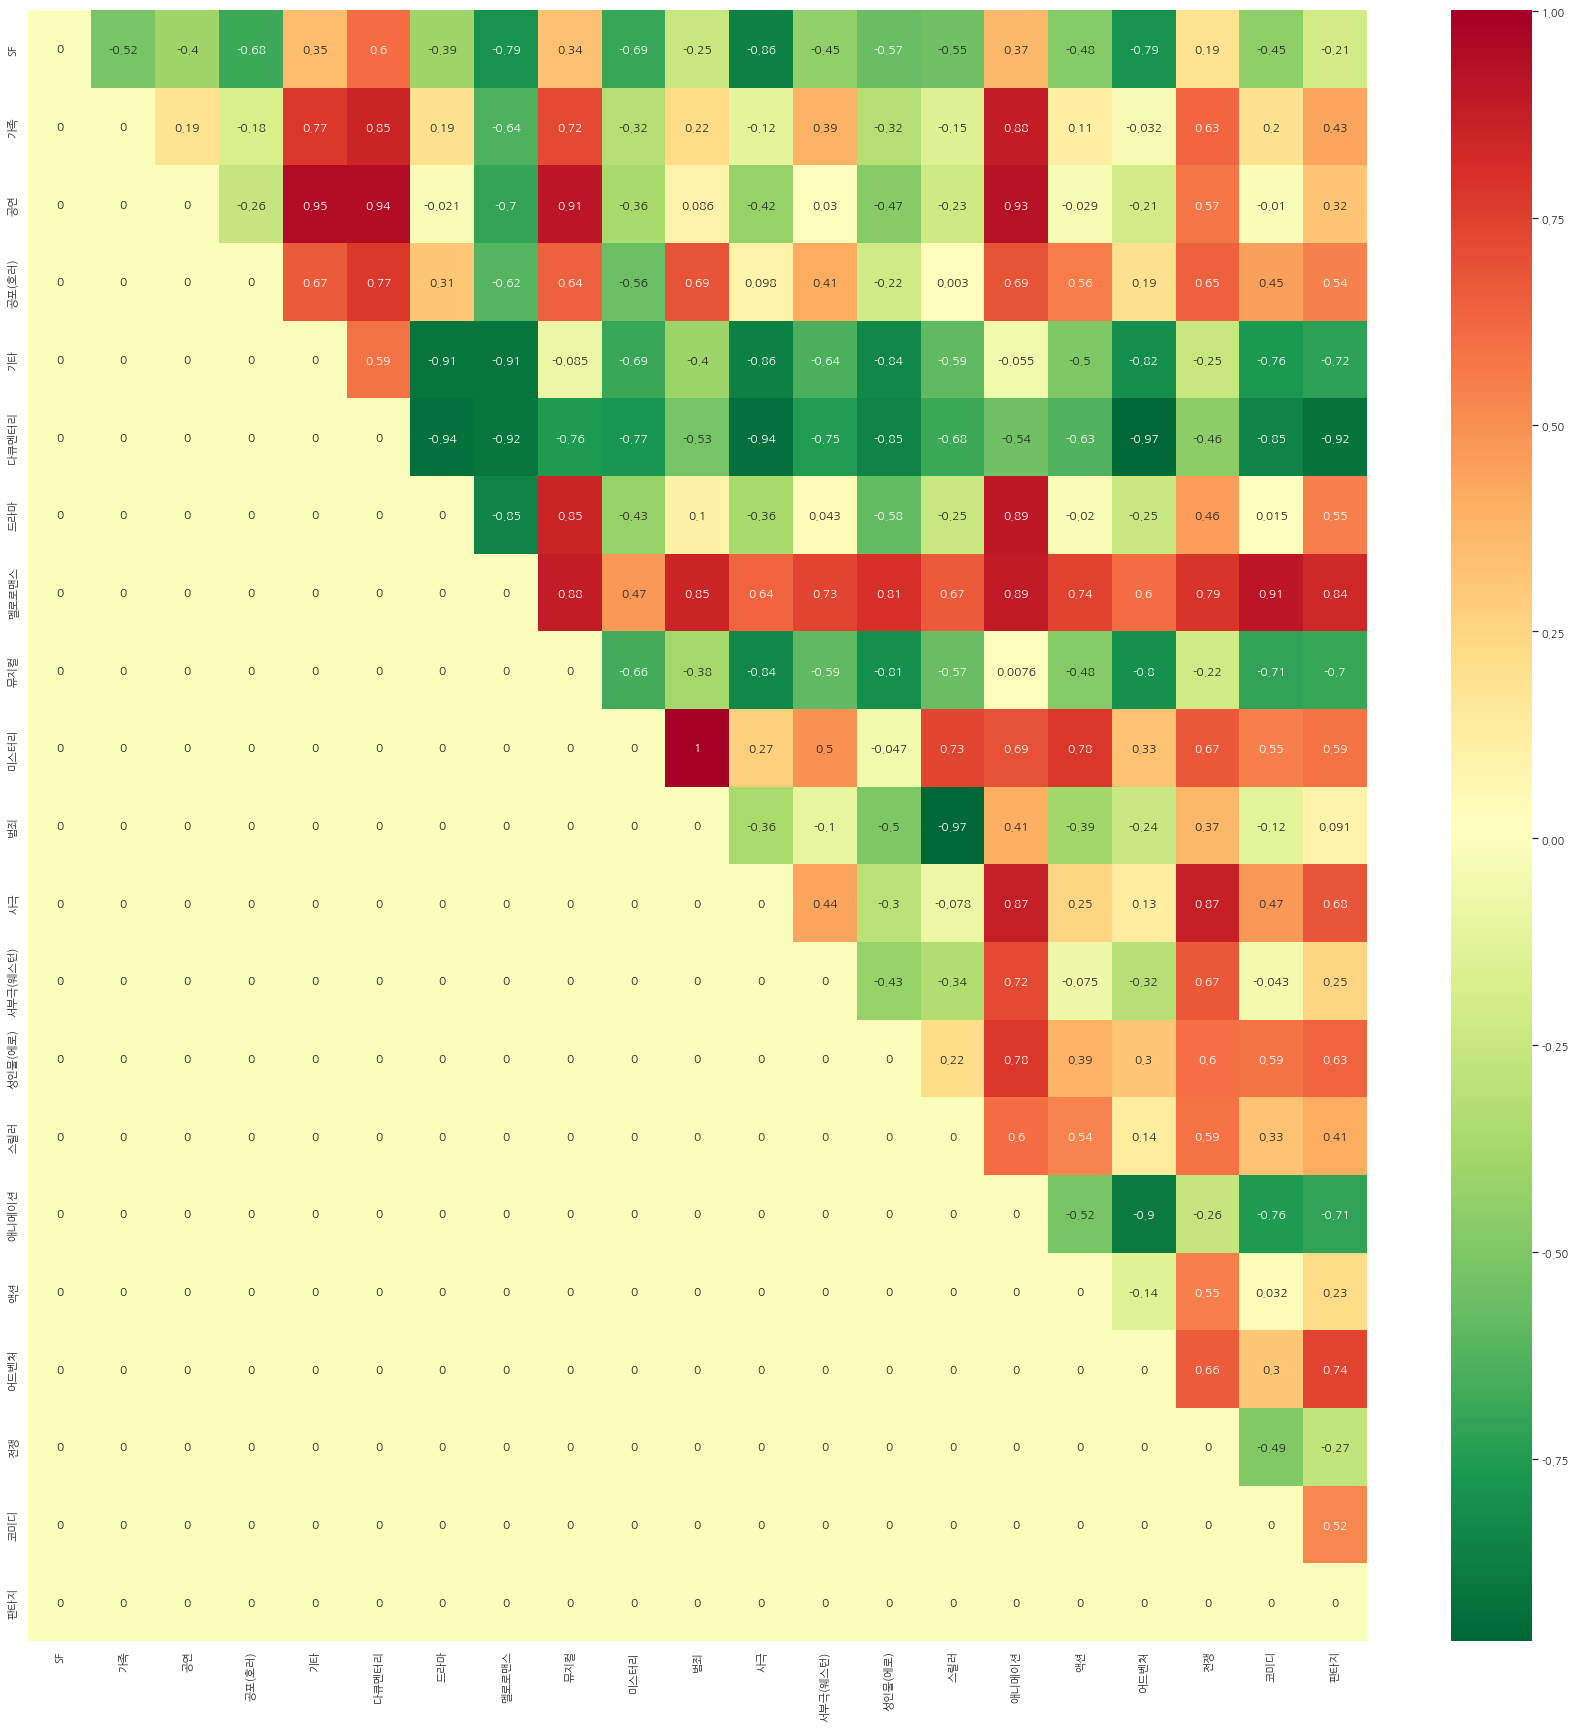

In [35]:
import numpy as np; 
import seaborn as sns; 
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 지원 폰트
sns.set(font='NanumGothic')

# 마이너스 부호 

plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize = (30,30))

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax